# Getting the light curves of several ONCvar variables to Alex Masegian

Alex would like these light curves:

ONCvar 427 - 


In [1]:
import matplotlib.pyplot as plt
import astropy.table
import astropy.coordinates

In [9]:
from wuvars.data import spreadsheet, photometry, quality_classes

onc_photometry = photometry.load_wserv_v2(5)
onc_photometry_by_source = photometry.group_wserv_v2(onc_photometry)

Loading WSERV5 photometry data... DONE (elapsed time: 0.17s)


In [5]:
filepath = "/Users/tsrice/Desktop/Bo_Tom/data/eclipsing_binaries.csv"

table = astropy.table.Table.read(filepath)

table

ID,ID (alt),RA (sex),DEC (sex),RA (decimal),DEC (decimal),Period (days),Reference,WFCAM SOURCEID,notes,index,ONCvar ID
str24,str23,str7,str13,str19,float64,str9,str1,int64,str41,int64,int64
ISOY J053454.31-045413.0,[RRS2004] NOFF W015,34:54.3,-04:54:13.000,83.72629167,-4.903611111,5.1993,1,-1,too far north,--,--
ISOY J053505.71-052354.1,JW 276,35:05.7,-05:23:54.100,83.77379167,-5.398361111,20.485,1,44199508518805,--,1,427
ISOY J053515.55-052514.1,Parenago 1872,35:15.5,-05:25:14.100,83.81479167,-5.420583333,-,1,-1,too bright,--,--
ISOY J053515.76-052309.9,theta1 Ori E,35:15.8,-05:23:09.900,83.81566667,-5.386083333,9.8952,1,-1,too bright,--,--
ISOY J053518.03-052205.4,[H97b] 9209,35:18.0,-05:22:05.400,83.825125,-5.368166667,5.6175,1,-1,too bright,--,--
ISOY J053526.88-044730.7,Parenago 2017,35:26.9,-04:47:30.700,83.862,-4.791861111,3.905625,1,-1,too far north,--,--
--,--,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...
--,--,--,--,--,--,--,--,--,--,--,--


In [13]:
useful_rows = (table['WFCAM SOURCEID'] > 0) 

In [18]:
[x for x in zip(table["WFCAM SOURCEID"][useful_rows], table['ONCvar ID'][useful_rows])]

[(44199508518805, 427),
 (44199508464743, 1100),
 (44199508567727, 788),
 (44199508546654, 122),
 (44199508449476, 518),
 (44199508512491, 1227),
 (44199508554632, 47),
 (44199508524123, 1147),
 (44199508497099, 1191),
 (44199508502908, 1190),
 (44199508511996, masked),
 (44199508519906, masked)]

In [19]:
useful_sourceids = table["WFCAM SOURCEID"][useful_rows]

In [20]:
useful_sourceids

44199508518805
44199508464743
44199508567727
44199508546654
44199508449476
44199508512491
44199508554632
44199508524123
44199508497099
44199508502908
44199508511996


In [32]:
op = onc_photometry

In [56]:
all_ebs = op[np.in1d(op["SOURCEID"], useful_sourceids)]
all_ebs.write('photometry_data_for_all_EBs.txt', format='ascii.ipac')

In [58]:
oncvar427_phot = op[op["SOURCEID"] == 44199508518805]
oncvar427_phot.write('photometry_data_for_oncvar427.txt', format='ascii.ipac')

44199508518805 427


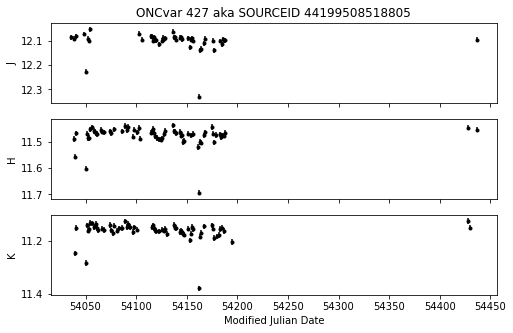

44199508464743 1100


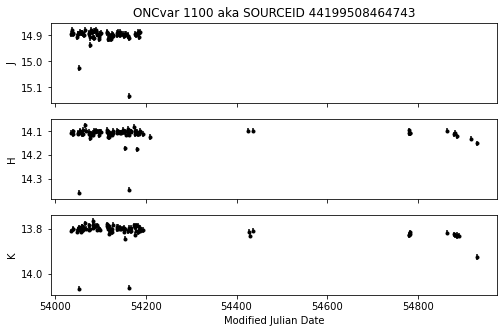

44199508567727 788


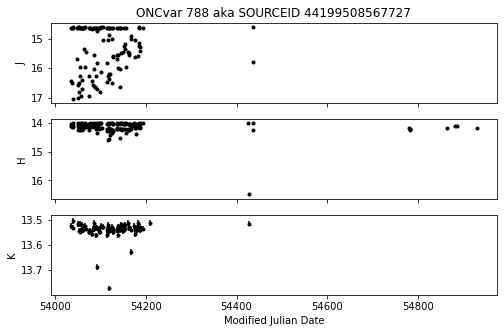

44199508546654 122


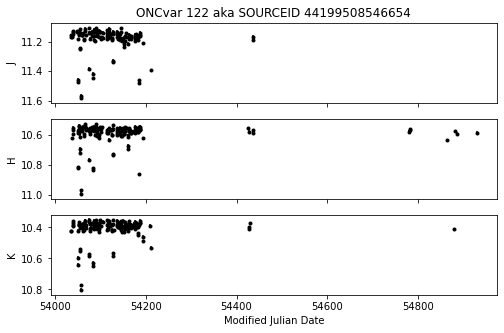

44199508449476 518


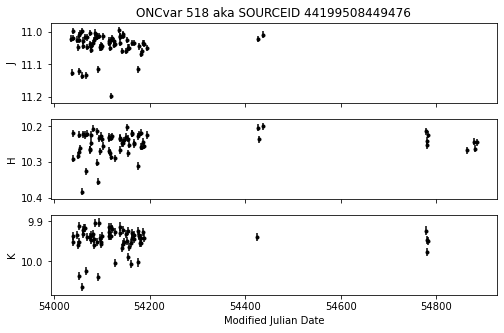

44199508512491 1227


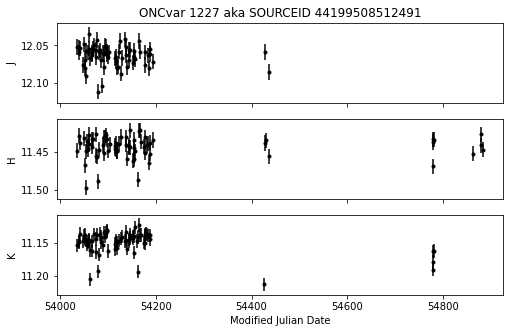

44199508554632 47


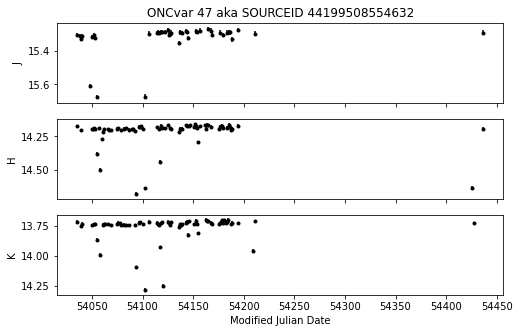

44199508524123 1147


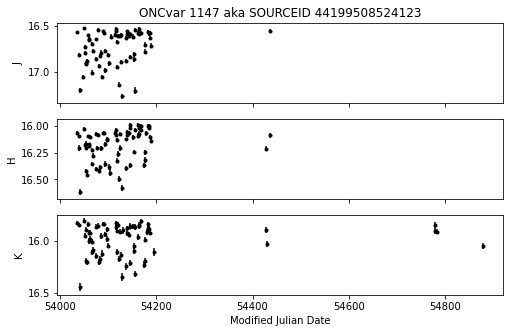

44199508497099 1191


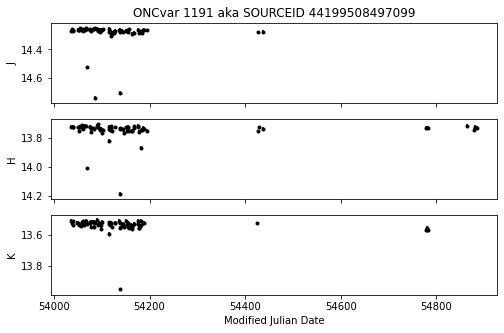

44199508502908 1190


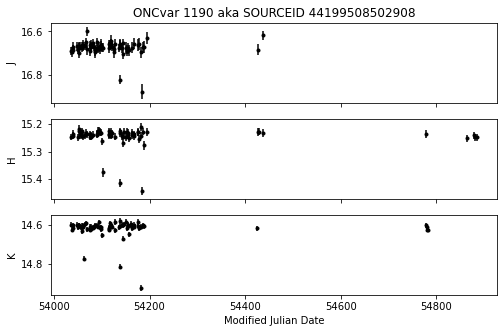

44199508511996 --


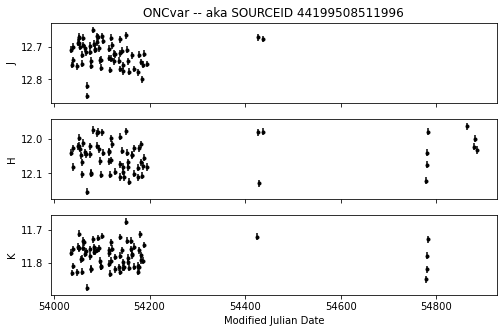

44199508519906 --


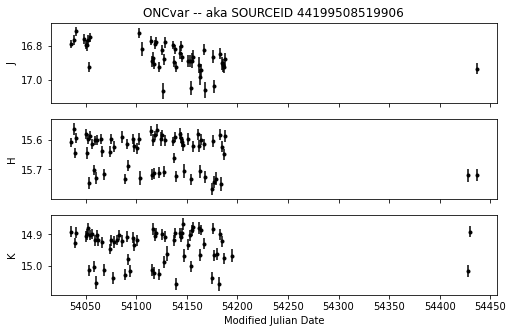

In [52]:
bands = ['J', 'H', 'K']

for (sourceid, oncvar_id) in zip(useful_sourceids, table['ONCvar ID'][useful_rows]):
    print(sourceid, oncvar_id)
    
    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(8,5), sharex=True)
    
    stardata = op[op['SOURCEID'] == sourceid]

    # This step prunes out "null" sentinel values from the plotting step.
    for column in stardata.colnames:
        try:
            stardata[column][stardata[column] == -999999500.0] = np.nan
        except:
            pass
    
    for (ax, band) in zip(axes, bands):
        
        ax.errorbar(stardata['MEANMJDOBS'], stardata[f"{band}APERMAG3"], yerr=stardata[f"{band}APERMAG3ERR"], fmt='k.')
        ax.invert_yaxis()
        ax.set_ylabel(band)
    axes[-1].set_xlabel("Modified Julian Date")
    axes[0].set_title(f"ONCvar {oncvar_id} aka SOURCEID {sourceid}")
        
    plt.show()
    
    plt.savefig()

In [43]:
min(stardata['JAPERMAG3'])

-999999500.0